# Lesson 0014 - MNIST Classification Neural Network
In this lesson, we revisit the MNIST dataset we introduced in [lesson 0010](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0010_mnist_classification_linear_classifier.ipynb).<br>
This time, we will train a neural network to the task of classification. We can steal pretty much code from [lesson 0010](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0010_mnist_classification_linear_classifier.ipynb).

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

C:\Users\Robert\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [2]:
( train_x, train_y ),( test_x, test_y ) = tf.keras.datasets.mnist.load_data()

In [3]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.14.3


In [4]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

2.2.2


In [5]:
mu = np.mean( train_x )

sigma = np.std( train_x )



train_x = ( train_x - mu ) / sigma

test_x = ( test_x - mu ) / sigma

In [6]:
train_x_f = np.zeros( shape = [ 60000, 28 * 28 ] )

train_y_f = np.zeros( shape = [ 60000, 10 ] )

test_x_f = np.zeros( shape = [ 10000, 28 * 28 ] )

test_y_f = np.zeros( shape = [ 10000, 10 ] )




for i in range( 60000 ):
    
    train_y_f[ i, train_y[ i ] ] = 1.0
    
    
for i in range( 10000 ):
    
    test_y_f[ i, test_y[ i ] ] = 1.0
    

for i in range( 60000 ):
    
    dummy = np.array( train_x[ i ] )
    
    train_x_f[ i, : ] = dummy.flatten()
    
    
for i in range( 10000 ):
    
    dummy = np.array( test_x[ i ] )
    
    test_x_f[ i ] = dummy.flatten()
    
    
    
    
train_x = train_x_f

train_y = train_y_f

test_x = test_x_f

test_y = test_y_f

Up until now, we stole code from [lesson 0010](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0010_mnist_classification_linear_classifier.ipynb) to prepare the data.<br>
Now, we build our first neural network. We will use the following architecture:<br>
-  we use a $28*28$ dimensional input layer.
-  in the second layer, we will use $28*28$ neurons. Each neuron will take the input vector $x$ and map it to $x\rightarrow LReLU\left( w^{T}x+b\right)$, where $w$ is a weight vector, $b$ is a scalar and $LReLU$ is the [leaky ReLu](https://www.tensorflow.org/api_docs/python/tf/nn/leaky_relu) function. $LReLu$ maps a scalar $x$ to $x\rightarrow \left\{\begin{array}{c}x\text{ if }x\geq0\\0.2x\text{ else}\end{array}\right.$. Therefore, $LReLu$ is highly nonlinear, but also, it is easy to compute, and also its derivative is easy to compute.
-  finally we will have an output layer of $10$ neurons, to which we apply the softmax function.<br>

We train this model for $1000$ iterations with $100$ randomly drawn training samples.<br>
In each iteration, we compute the accuracy on the current training set, the complete training set and the test set.<br>
We use a learning rate of $0.1$.<br>
We initialize the weights with [the truncated normal distributon](https://www.tensorflow.org/api_docs/python/tf/random/truncated_normal). This way, the weights are randomly distributed. If we initialize the weights with $0$, the training will get stuck, because the weights are updated with the gradient, and if we initialize the weights with $0$, then the gradients for varying training examples will contradict each other.

In [7]:
x_tf = tf.placeholder( tf.float32, shape = [ None, 28 * 28 ] )

y_tf = tf.placeholder( tf.float32, shape = [ None, 10 ] )




W_tf_1 = tf.Variable( tf.truncated_normal( [ 28 * 28, 28 * 28 ] ) )

b_tf_1 = tf.Variable( tf.truncated_normal( [ 28 * 28 ] ) )

layer_2 = tf.nn.leaky_relu( tf.matmul( x_tf, W_tf_1 ) + b_tf_1 )




W_tf_2 = tf.Variable( tf.truncated_normal( [ 28 * 28, 10 ] ) )

b_tf_2 = tf.Variable( tf.truncated_normal( [ 10 ] ) )

layer_3 = tf.nn.leaky_relu( tf.matmul( layer_2, W_tf_2 ) + b_tf_2 )




cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = layer_3, labels = y_tf ) )




gd = tf.train.GradientDescentOptimizer( 0.1 ).minimize( cross_entropy )



hit = tf.equal( tf.argmax( layer_3, 1 ), tf.argmax( y_tf, 1 ) )



accuracy = 100 * tf.reduce_mean( tf.cast( hit, tf.float32 ) )

In [8]:
sess = tf.Session()

progress_train = []

progress_train_current = []

progress_test = []
 
    
    
sess.run( tf.global_variables_initializer() )
        
for i in range( 1000 ):
                
    random_integers = np.random.choice( range( 60000 ), 100, replace = False )
                
    local_x = train_x[ random_integers, : ]
    
    local_y = train_y[ random_integers, : ]
        
    sess.run( gd, feed_dict = { x_tf : local_x, y_tf : local_y } )
        
    progress_train.append( sess.run( accuracy, feed_dict = { x_tf : train_x, y_tf : train_y } ) )
        
    progress_train_current.append( sess.run( accuracy, feed_dict = { x_tf : local_x, y_tf : local_y } ) )
        
    progress_test.append( sess.run( accuracy, feed_dict = { x_tf : test_x, y_tf : test_y } ) )

Text(0,0.5,'Accuracy (%)')

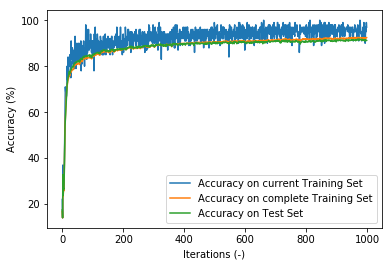

In [9]:
plt.plot( progress_train_current, label = 'Accuracy on current Training Set' )

plt.plot( progress_train, label = 'Accuracy on complete Training Set' )

plt.plot( progress_test, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

So, we achieved a decent recognition rate. Let us save the model.<br>
For this, we employ [the Saver](https://www.tensorflow.org/api_docs/python/tf/train/Saver).

In [10]:
saver = tf.train.Saver()

saver.save( sess, "C:\\Users\\Robert\\Desktop\\python\\python 3\\github\\lesson_0014\\neural_network_1000" )

'C:\\Users\\Robert\\Desktop\\python\\python 3\\github\\lesson_0014\\neural_network_1000'

Now, we close the session __sess__, and try to predict some data.

In [11]:
sess.close()

In [12]:
sess.run( accuracy, feed_dict = { x_tf : test_x, y_tf : test_y } )

RuntimeError: Attempted to use a closed Session.

This tells us, that the session is closed, and that we can't access the neural network anymore.<br>
Luckily, we can restore the session.

In [13]:
sess = tf.Session()

saver.restore( sess, "C:\\Users\\Robert\\Desktop\\python\\python 3\\github\\lesson_0014\\neural_network_1000" )

INFO:tensorflow:Restoring parameters from C:\Users\Robert\Desktop\python\python 3\github\lesson_0014\neural_network_1000


Now, we do the following: we continue training the restored neural network. We train for another $9000$ iterations.<br>
But we check every $500$ iterations whether the performance on the test set increased on average. If so, we save the model, else, we break.

In [14]:
for i in range( 9000 ):
                
    random_integers = np.random.choice( range( 60000 ), 100, replace = False )
                
    local_x = train_x[ random_integers, : ]
    
    local_y = train_y[ random_integers, : ]
        
    sess.run( gd, feed_dict = { x_tf : local_x, y_tf : local_y } )
        
    progress_train.append( sess.run( accuracy, feed_dict = { x_tf : train_x, y_tf : train_y } ) )
        
    progress_train_current.append( sess.run( accuracy, feed_dict = { x_tf : local_x, y_tf : local_y } ) )
        
    progress_test.append( sess.run( accuracy, feed_dict = { x_tf : test_x, y_tf : test_y } ) )
    
    if ( i % 500 ) == 0:
        
        if ( np.mean( progress_test[ ( i - 500 ) : ( i - 1 ) ] ) > np.mean( progress_test[ ( i - 1000 ) : ( i - 501 ) ] ) ):
            
            saver.save( sess, "C:\\Users\\Robert\\Desktop\\python\\python 3\\github\\lesson_0014\\neural_network_" + 
                       str( i + 1000 ) )
            
        else:
            
            break

Text(0,0.5,'Accuracy (%)')

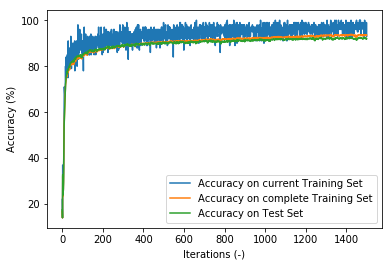

In [15]:
plt.plot( progress_train_current, label = 'Accuracy on current Training Set' )

plt.plot( progress_train, label = 'Accuracy on complete Training Set' )

plt.plot( progress_test, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

In [16]:
sess.close()

We did not improve on the test set, so we close the session __sess__.<br>
If we look closely, we notice, that the performance on the training set starts getting better than the performance  on the test set. This is called __overfitting__. And __overfitting__ is great.<br>
__Overfitting__ is bad, because the performance can only improve on the training set and remain constant on the test set, if the model starts learning the noise in the training set. But this only happens, when the model has learnt everything it can learn from the training set that is also valid in the test set. Therefore: we should always train neural models until they start to overfit, and then abort the training.<br>
Class dismissed.